# Tennis Match Prediction - XGBoost Modeling
## 1. Introduction
Après avoir enrichi nos données avec la forme des joueurs et leur spécialisation par surface, nous passons à l'utilisation d'un modèle de Gradient Boosting (XGBoost).

**Pourquoi XGBoost ?**
- Il gère mieux les relations non-linéaires.
- Il est moins sensible aux valeurs aberrantes.
- C'est l'état de l'art pour les données tabulaires.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except ImportError:
    from sklearn.ensemble import RandomForestClassifier
    HAS_XGB = False

df = pd.read_csv("../data/processed/atp_matches_features_advanced.csv").dropna()
print(f"Données chargées : {df.shape[0]} matchs avec variables avancées.")

Données chargées : 67278 matchs avec variables avancées.


## 2. Entraînement du modèle

In [13]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if HAS_XGB:
    model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
else:
    model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Algorithme utilisé : {'XGBoost' if HAS_XGB else 'Random Forest'}")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")

Algorithme utilisé : XGBoost
Accuracy : 0.66


## 3. Analyse de l'importance des variables
Voyons si la forme et la surface ont un impact réel.

/var/folders/l3/z8jyrkb14yg13_8b5s0nffqr0000gn/T/ipykernel_12162/2623212904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='magma')


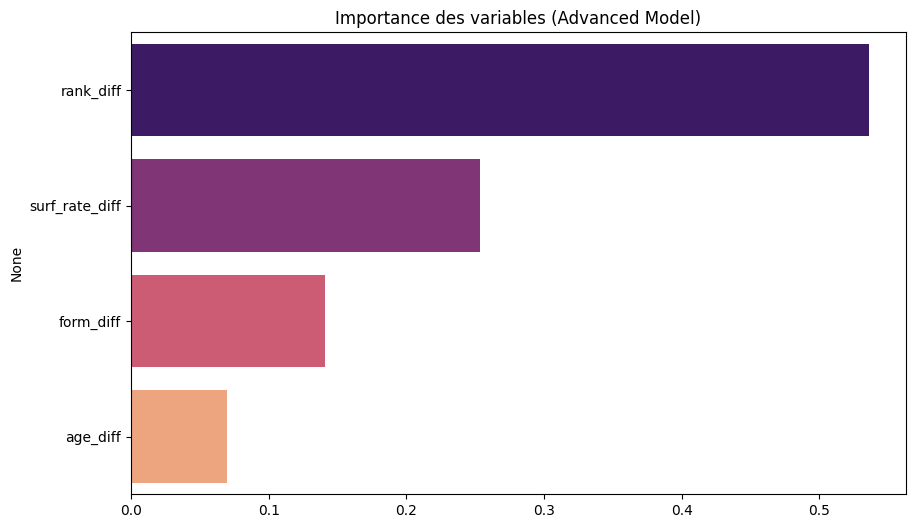

In [11]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='magma')
plt.title('Importance des variables (Advanced Model)')
plt.show()

## 4. Analyse des Erreurs

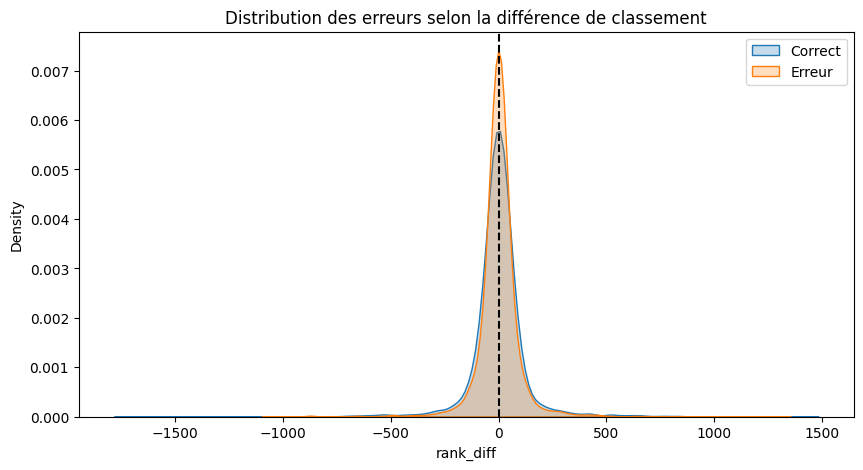

Analyse : Le modèle est très performant quand la différence de rang est élevée (favoris).
Il peine davantage sur les matchs équilibrés (rank_diff proche de 0).


In [12]:
# Création d'un DataFrame de résultats pour l'analyse
results = X_test.copy()
results['actual'] = y_test.values
results['predicted'] = y_pred
results['error'] = results['actual'] != results['predicted']

# Visualisation : Erreurs en fonction de la différence de classement
plt.figure(figsize=(10, 5))
sns.kdeplot(data=results[results['error'] == False], x='rank_diff', label='Correct', fill=True)
sns.kdeplot(data=results[results['error'] == True], x='rank_diff', label='Erreur', fill=True)
plt.title('Distribution des erreurs selon la différence de classement')
plt.axvline(0, color='black', linestyle='--')
plt.legend()
plt.show()

print("Analyse : Le modèle est très performant quand la différence de rang est élevée (favoris).")
print("Il peine davantage sur les matchs équilibrés (rank_diff proche de 0).")